In [1]:
"""ReGraph hierarchy tutorial ex 2."""
import networkx as nx

from regraph import (NetworkXHierarchy, Rule,
                     add_nodes_from,
                     add_edges_from,
                     plot_graph, plot_instance, plot_rule)

In [2]:
# create an empty hierarchy
hierarchy = NetworkXHierarchy()

In [3]:
# initialize graphs
colors = nx.DiGraph()
add_nodes_from(
    colors,
    ["red", "blue"]
)
add_edges_from(
    colors,
    [("red", "red"), ("blue", "red"), ("red", "blue")]
)
hierarchy.add_graph("colors", colors)

mmm = nx.DiGraph()
add_nodes_from(
    mmm,
    ["component", "state", "action"]
)

add_edges_from(
    mmm,
    [("component", "action"),
     ("component", "component"),
     ("state", "component"),
     ("action", "state")]
)

hierarchy.add_graph("mmm", mmm)

mm = nx.DiGraph()
add_nodes_from(
    mm,
    ["gene", "residue", "state", "mod"]
)
add_edges_from(
    mm,
    [("residue", "gene"),
     ("state", "gene"),
     ("state", "residue"),
     ("mod", "state"),
     ("gene", "mod")]
)
hierarchy.add_graph("mm", mm)

action_graph = nx.DiGraph()
add_nodes_from(
    action_graph,
    ["A", "A_res_1", "p", "B", "mod"]
)

add_edges_from(
    action_graph,
    [("A_res_1", "A"),
     ("p", "A_res_1"),
     ("mod", "p"),
     ("B", "mod")]
)
hierarchy.add_graph(
    "ag", action_graph
)

nugget_1 = nx.DiGraph()
add_nodes_from(
    nugget_1,
    ["A", "A_res_1", "p", "B", "mod"]
)
add_edges_from(
    nugget_1,
    [("A_res_1", "A"),
     ("p", "A_res_1"),
     ("mod", "p"),
     ("B", "mod")]
)
hierarchy.add_graph(
    "n1", nugget_1
)

# add typings
hierarchy.add_typing(
    "mm", "mmm",
    {
        "gene": "component",
        "residue": "component",
        "state": "state",
        "mod": "action"
    }
)

hierarchy.add_typing(
    "mm", "colors",
    {
        "gene": "red",
        "residue": "red",
        "state": "red",
        "mod": "blue"
    }
)
hierarchy.add_typing(
    "ag", "mm",
    {
        "A": "gene",
        "B": "gene",
        "A_res_1": "residue",
        "mod": "mod",
        "p": "state"
    }
)
hierarchy.add_typing(
    "n1", "ag",
    dict((n, n) for n in nugget_1.nodes()),
)

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


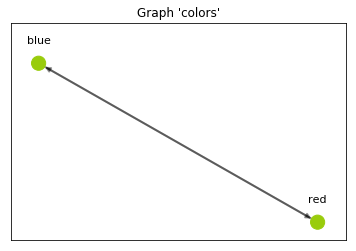

In [4]:
colors_pos = plot_graph(
    hierarchy.graph["colors"], title="Graph 'colors'")

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


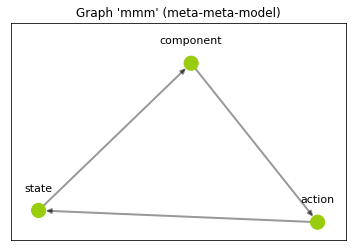

In [5]:
mmm_pos = plot_graph(
    hierarchy.graph["mmm"], title="Graph 'mmm' (meta-meta-model)")

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


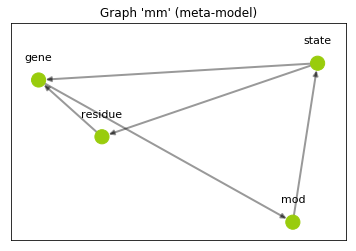

In [6]:
mm_pos = plot_graph(
    hierarchy.graph["mm"], title="Graph 'mm' (meta-model)")

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


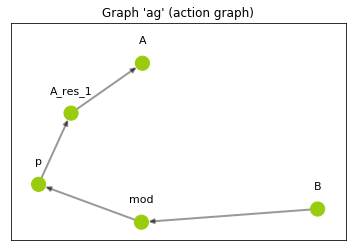

In [7]:
ag_pos = plot_graph(
    hierarchy.graph["ag"], title="Graph 'ag' (action graph)")

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


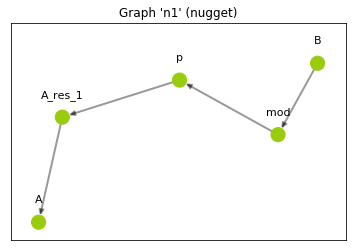

In [8]:
n1_pos = plot_graph(
    hierarchy.graph["n1"], title="Graph 'n1' (nugget)")

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



Rule 1: contains cloning of nodes
---------------------------------
Preserved part
['gene', 'residue', 'gene1']
[('residue', 'gene')]
Left hand side
['gene', 'residue']
[('residue', 'gene')]
P->L Homomorphism : {'gene': 'gene', 'residue': 'residue', 'gene1': 'gene'}
Right hand side
['gene', 'residue', 'gene1']
[('residue', 'gene')]
P->R Homomorphism : {'gene': 'gene', 'residue': 'residue', 'gene1': 'gene1'}

{'gene': array([0.18751988, 0.84439406]), 'residue': array([0.46531829, 0.15560594]), 'gene1': array([-0.65283817, -1.        ])} 


{'gene': array([0.18751988, 0.84439406]), 'residue': array([0.46531829, 0.15560594])} 




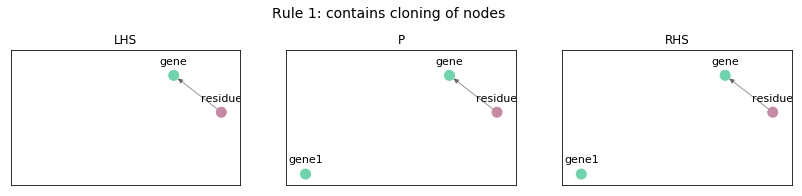

with the typing of the left-hand side:  {'mm': {'gene': 'gene', 'residue': 'residue'}}
Instances of the lhs found in 'ag':  [{'gene': 'A', 'residue': 'A_res_1'}]


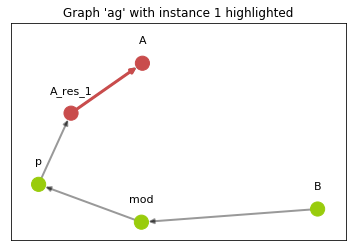

	-> Applying the rule to the instance of 'ag':  {'gene': 'A', 'residue': 'A_res_1'}


In [9]:
# define a rule that clones nodes
pattern = nx.DiGraph()
add_nodes_from(pattern, ["gene", "residue"])
add_edges_from(pattern, [("residue", "gene")])

cloning_rule = Rule.from_transform(pattern)
clone_name, _ = cloning_rule.inject_clone_node("gene")
cloning_rule.inject_remove_edge("residue", clone_name)

print("\nRule 1: contains cloning of nodes")
print("---------------------------------")
print(cloning_rule)
plot_rule(cloning_rule, title="Rule 1: contains cloning of nodes")

lhs_typing = {
    "mm": {"gene": "gene", "residue": "residue"}
}
print("with the typing of the left-hand side: ", lhs_typing)

# find matching of the lhs of the cloning rule in 'ag'
instances = hierarchy.find_matching(
    "ag", cloning_rule.lhs, lhs_typing)
print("Instances of the lhs found in 'ag': ", instances)
for i, instance in enumerate(instances):
    plot_instance(
        hierarchy.graph["ag"], cloning_rule.lhs,
        instance, parent_pos=ag_pos,
        title="Graph 'ag' with instance {} highlighted".format(i + 1))
    
print("\t-> Applying the rule to the instance of 'ag': ", instances[0])

In [10]:
_, rhs_instance = hierarchy.rewrite("ag", cloning_rule, instances[0])

In [11]:
rhs_instance

{'gene': 'A', 'residue': 'A_res_1', 'gene1': 'A1'}

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


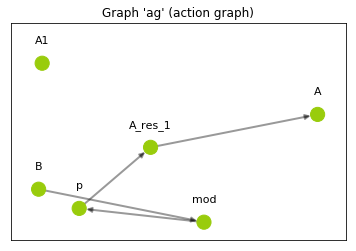

In [12]:
ag_pos = plot_graph(
    hierarchy.graph["ag"], title="Graph 'ag' (action graph)")

	Result of rewriting with rule 1: 


/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


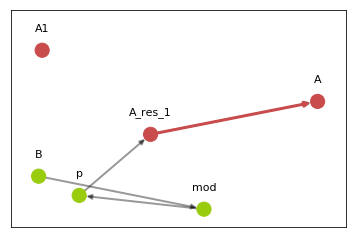

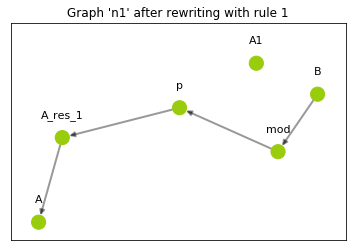

	Updated typing 'n1'->'ag':  {'A': 'A', 'A_res_1': 'A_res_1', 'p': 'p', 'B': 'B', 'mod': 'mod', 'A1': 'A1'}
	Updated typing 'ag'->'mm':  {'A': 'gene', 'A_res_1': 'residue', 'p': 'state', 'B': 'gene', 'mod': 'mod', 'A1': 'gene'}


In [13]:
print("\tResult of rewriting with rule 1: ")
plot_instance(hierarchy.graph["ag"], cloning_rule.rhs, rhs_instance,
              parent_pos=ag_pos)
n1_pos = plot_graph(hierarchy.graph["n1"],
           parent_pos=n1_pos,
           title="Graph 'n1' after rewriting with rule 1")
print("\tUpdated typing 'n1'->'ag': ", hierarchy.typing["n1"]["ag"])
print("\tUpdated typing 'ag'->'mm': ", hierarchy.typing["ag"]["mm"])


Rule 2: contains addition of nodes 
----------------------------------
Preserved part
['B']
[]
Left hand side
['B']
[]
P->L Homomorphism : {'B': 'B'}
Right hand side
['B', 'B_res_1', 'X', 'Y']
[('B_res_1', 'B')]
P->R Homomorphism : {'B': 'B'}

{'B': array([0., 0.])} 


{'B': array([0., 0.])} 




/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


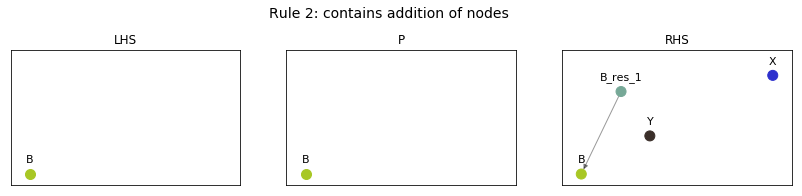

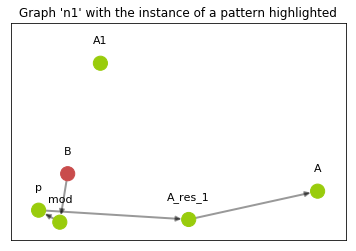

with the typing of the right-hand side:  {'mm': {'B_res_1': 'residue'}, 'mmm': {'X': 'component'}, 'colors': {'Y': 'red'}}


In [14]:
# create a rule that adds new nodes
p = nx.DiGraph()
add_nodes_from(p, ["B"])

l = nx.DiGraph()
add_nodes_from(l, ["B"])

r = nx.DiGraph()
add_nodes_from(r, ["B", "B_res_1", "X", "Y"])
add_edges_from(r, [("B_res_1", "B")])

adding_rule = Rule(p, l, r)
print("\nRule 2: contains addition of nodes ")
print("----------------------------------")
print(adding_rule)
plot_rule(adding_rule, title="Rule 2: contains addition of nodes")

instance = {"B": "B"}
plot_instance(
    hierarchy.graph["n1"], adding_rule.lhs, instance,
    title="Graph 'n1' with the instance of a pattern highlighted")

# define the right-hand side typing of the rule
rhs_typing = {
    "mm": {"B_res_1": "residue"},
    "mmm": {"X": "component"},
    "colors": {"Y": "red"}
}
print("with the typing of the right-hand side: ", rhs_typing)

In [15]:
print("\t->Applying the rule to the instance: ", instance)

# perform rewriting
_, rhs_instance = hierarchy.rewrite(
    "n1", adding_rule, instance, lhs_typing=None, rhs_typing=rhs_typing)

	->Applying the rule to the instance:  {'B': 'B'}


	Result of rewriting with rule 2: 


/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


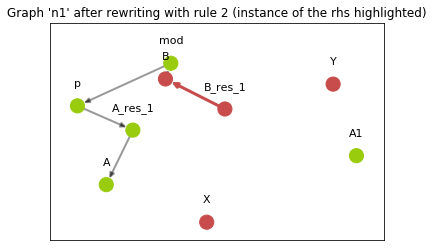

{'A': array([-0.57012229, -0.54065683]),
 'A_res_1': array([-0.40313121, -0.03815962]),
 'p': array([-0.75099561,  0.18531803]),
 'B': array([-0.19869478,  0.43314213]),
 'mod': array([-0.1651557,  0.5782276]),
 'A1': array([ 1.        , -0.27364519]),
 'B_res_1': array([0.17431654, 0.15665219]),
 'X': array([ 0.06020612, -0.8866356 ]),
 'Y': array([0.85357694, 0.3857573 ])}

In [16]:
print("\tResult of rewriting with rule 2: ")
plot_instance(
    hierarchy.graph["n1"], adding_rule.rhs, rhs_instance,
    title="Graph 'n1' after rewriting with rule 2 "
          "(instance of the rhs highlighted)")

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


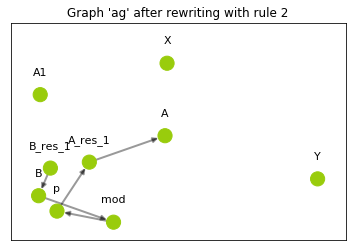

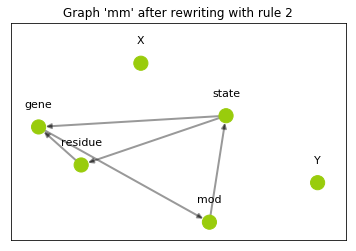

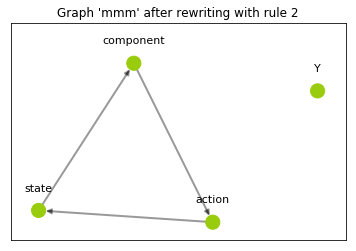

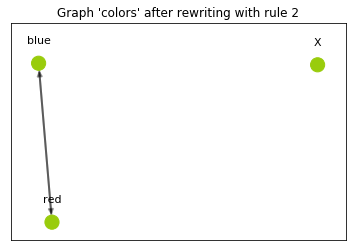

		Updated typing 'n1'->'ag':  {'A': 'A', 'A_res_1': 'A_res_1', 'p': 'p', 'B': 'B', 'mod': 'mod', 'A1': 'A1', 'B_res_1': 'B_res_1', 'X': 'X', 'Y': 'Y'}
		Updated typing 'ag'->'mm':  {'A': 'gene', 'A_res_1': 'residue', 'p': 'state', 'B': 'gene', 'mod': 'mod', 'A1': 'gene', 'B_res_1': 'residue', 'X': 'X', 'Y': 'Y'}
		Updated typing 'mm'->'mmm':  {'gene': 'component', 'residue': 'component', 'state': 'state', 'mod': 'action', 'X': 'component', 'Y': 'Y'}
		Updated typing 'mm'->'colors':  {'gene': 'red', 'residue': 'red', 'state': 'red', 'mod': 'blue', 'X': 'X', 'Y': 'red'}


In [17]:
ag_pos = plot_graph(hierarchy.graph["ag"], parent_pos=ag_pos,
           title="Graph 'ag' after rewriting with rule 2")
mm_pos = plot_graph(hierarchy.graph["mm"], parent_pos=mm_pos,
           title="Graph 'mm' after rewriting with rule 2")
mmm_pos = plot_graph(hierarchy.graph["mmm"], parent_pos=mmm_pos,
           title="Graph 'mmm' after rewriting with rule 2")
colors_pos = plot_graph(hierarchy.graph["colors"], parent_pos=colors_pos,
           title="Graph 'colors' after rewriting with rule 2")

print("\t\tUpdated typing 'n1'->'ag': ", hierarchy.typing["n1"]["ag"])
print("\t\tUpdated typing 'ag'->'mm': ", hierarchy.typing["ag"]["mm"])
print("\t\tUpdated typing 'mm'->'mmm': ", hierarchy.typing["mm"]["mmm"])
print("\t\tUpdated typing 'mm'->'colors': ",
      hierarchy.typing["mm"]["colors"])


Rule 3: contains merge of nodes
-------------------------------
Preserved part
[1, 2]
[]
Left hand side
[1, 2]
[(2, 1)]
P->L Homomorphism : {1: 1, 2: 2}
Right hand side
['hybrid']
[]
P->R Homomorphism : {1: 'hybrid', 2: 'hybrid'}

with the typing of the left-hand side:  {'mm': {1: 'gene', 2: 'residue'}}
with the typing of the right-hand side:  {'mmm': {'hybrid': 'component'}}
{1: array([0.82226503, 1.        ]), 2: array([-0.82226503, -1.        ])} 


{1: array([0.82226503, 1.        ]), 2: array([-0.82226503, -1.        ])} 




/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


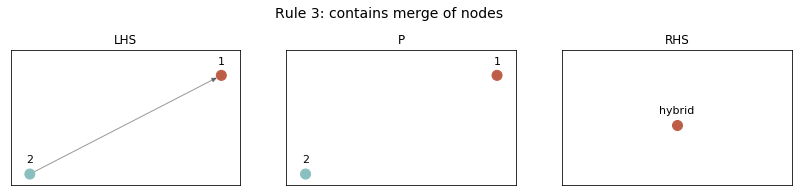

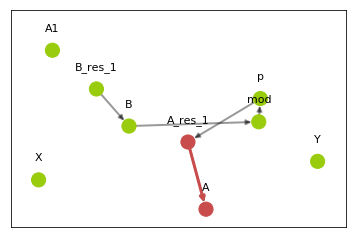

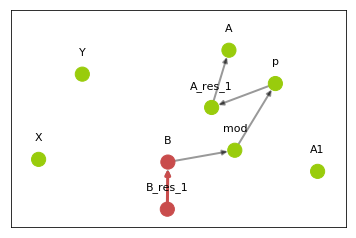

In [18]:
# define a rule that merges nodes
pattern = nx.DiGraph()
pattern.add_nodes_from([1, 2])
pattern.add_edges_from([(2, 1)])
merging_rule = Rule.from_transform(pattern)
merging_rule.inject_remove_edge(2, 1)
merging_rule.inject_merge_nodes([1, 2], "hybrid")
print("\nRule 3: contains merge of nodes")
print("-------------------------------")
print(merging_rule)

lhs_typing = {"mm": {1: "gene", 2: "residue"}}
rhs_typing = {"mmm": {"hybrid": "component"}}

print("with the typing of the left-hand side: ", lhs_typing)
print("with the typing of the right-hand side: ", rhs_typing)


plot_rule(merging_rule, title="Rule 3: contains merge of nodes")

instances = hierarchy.find_matching("n1", merging_rule.lhs, lhs_typing)
for instance in instances:
    plot_instance(hierarchy.graph["n1"], merging_rule.lhs, instance)

In [19]:
print("\t-> Applying the rule to the instance of 'n1': ", instances[0])
hierarchy.rewrite(
    "n1", merging_rule, instances[0], rhs_typing)


print("\t-> Applying the rule to the instance of 'n1': ", instances[1])
hierarchy.rewrite(
    "n1", merging_rule, instances[1], rhs_typing)



	-> Applying the rule to the instance of 'n1':  {1: 'A', 2: 'A_res_1'}
	-> Applying the rule to the instance of 'n1':  {1: 'B', 2: 'B_res_1'}


(<regraph.networkx.hierarchy.NetworkXHierarchy at 0x7f38eaf95128>,
 {'hybrid': 'B_B_res_1'})

	Result of rewriting with rule 3 both instances ([{1: 'A', 2: 'A_res_1'}, {1: 'B', 2: 'B_res_1'}]): 


/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


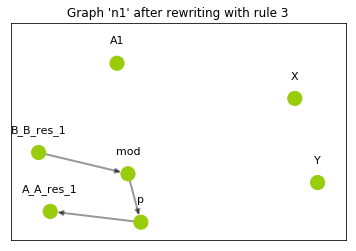

{'p': array([-0.07193571, -0.68227029]),
 'mod': array([-0.13601186, -0.17001353]),
 'A1': array([-0.1908218,  1.       ]),
 'X': array([0.69494885, 0.62763444]),
 'Y': array([ 0.80842303, -0.26296007]),
 'A_A_res_1': array([-0.52333461, -0.56792569]),
 'B_B_res_1': array([-0.5812679 ,  0.05553515])}

In [20]:
print("\tResult of rewriting with rule 3 both instances ({}): ".format(
    instances))
plot_graph(hierarchy.graph["n1"],
           title="Graph 'n1' after rewriting with rule 3")

In [21]:
hierarchy.graph["ag"].nodes()

NodeView(('p', 'mod', 'A1', 'X', 'Y', 'A_A_res_1', 'B_B_res_1'))

/home/eugenia/anaconda3/envs/regraph_v2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


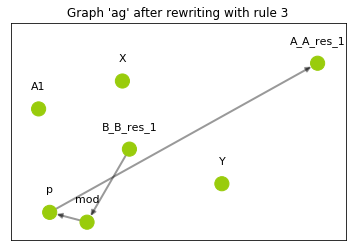

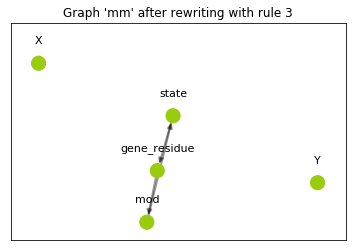

		Updated typing 'n1'->'ag':  {'p': 'p', 'mod': 'mod', 'A1': 'A1', 'X': 'X', 'Y': 'Y', 'A_A_res_1': 'A_A_res_1', 'B_B_res_1': 'B_B_res_1'}
		Updated typing 'ag'->'mm':  {'p': 'state', 'mod': 'mod', 'A1': 'gene_residue', 'X': 'X', 'Y': 'Y', 'A_A_res_1': 'gene_residue', 'B_B_res_1': 'gene_residue'}
		Updated typing 'mm'->'mmm':  {'state': 'state', 'mod': 'action', 'X': 'component', 'Y': 'Y', 'gene_residue': 'component'}
		Updated typing 'mm'->'colors':  {'state': 'red', 'mod': 'blue', 'X': 'X', 'Y': 'red', 'gene_residue': 'red'}


In [24]:
plot_graph(hierarchy.graph["ag"], parent_pos=ag_pos,
           title="Graph 'ag' after rewriting with rule 3")
plot_graph(hierarchy.graph["mm"], parent_pos=mm_pos,
           title="Graph 'mm' after rewriting with rule 3")
print("\t\tUpdated typing 'n1'->'ag': ", hierarchy.typing["n1"]["ag"])
print("\t\tUpdated typing 'ag'->'mm': ", hierarchy.typing["ag"]["mm"])
print("\t\tUpdated typing 'mm'->'mmm': ", hierarchy.typing["mm"]["mmm"])
print("\t\tUpdated typing 'mm'->'colors': ",
      hierarchy.typing["mm"]["colors"])